## TPOT Demonstration
Example of tpot for a classification dataset
https://www.kaggle.com/code/tanmay111999/approach-for-binary-classification-heart-failure

From TPOT's paper:<br>auto-sklearn uses Bayesian optimization to discover the ideal combination of feature preprocessors, models, and model hyperparameters to maximize classification accuracy.<br>However, auto-sklearn explores a fixed set of pipelines that only include one data preprocessor, one feature preprocessor, and one model. Thus, auto-sklearn
is incapable of producing arbitrarily large pipelines, which may be important for autoML.

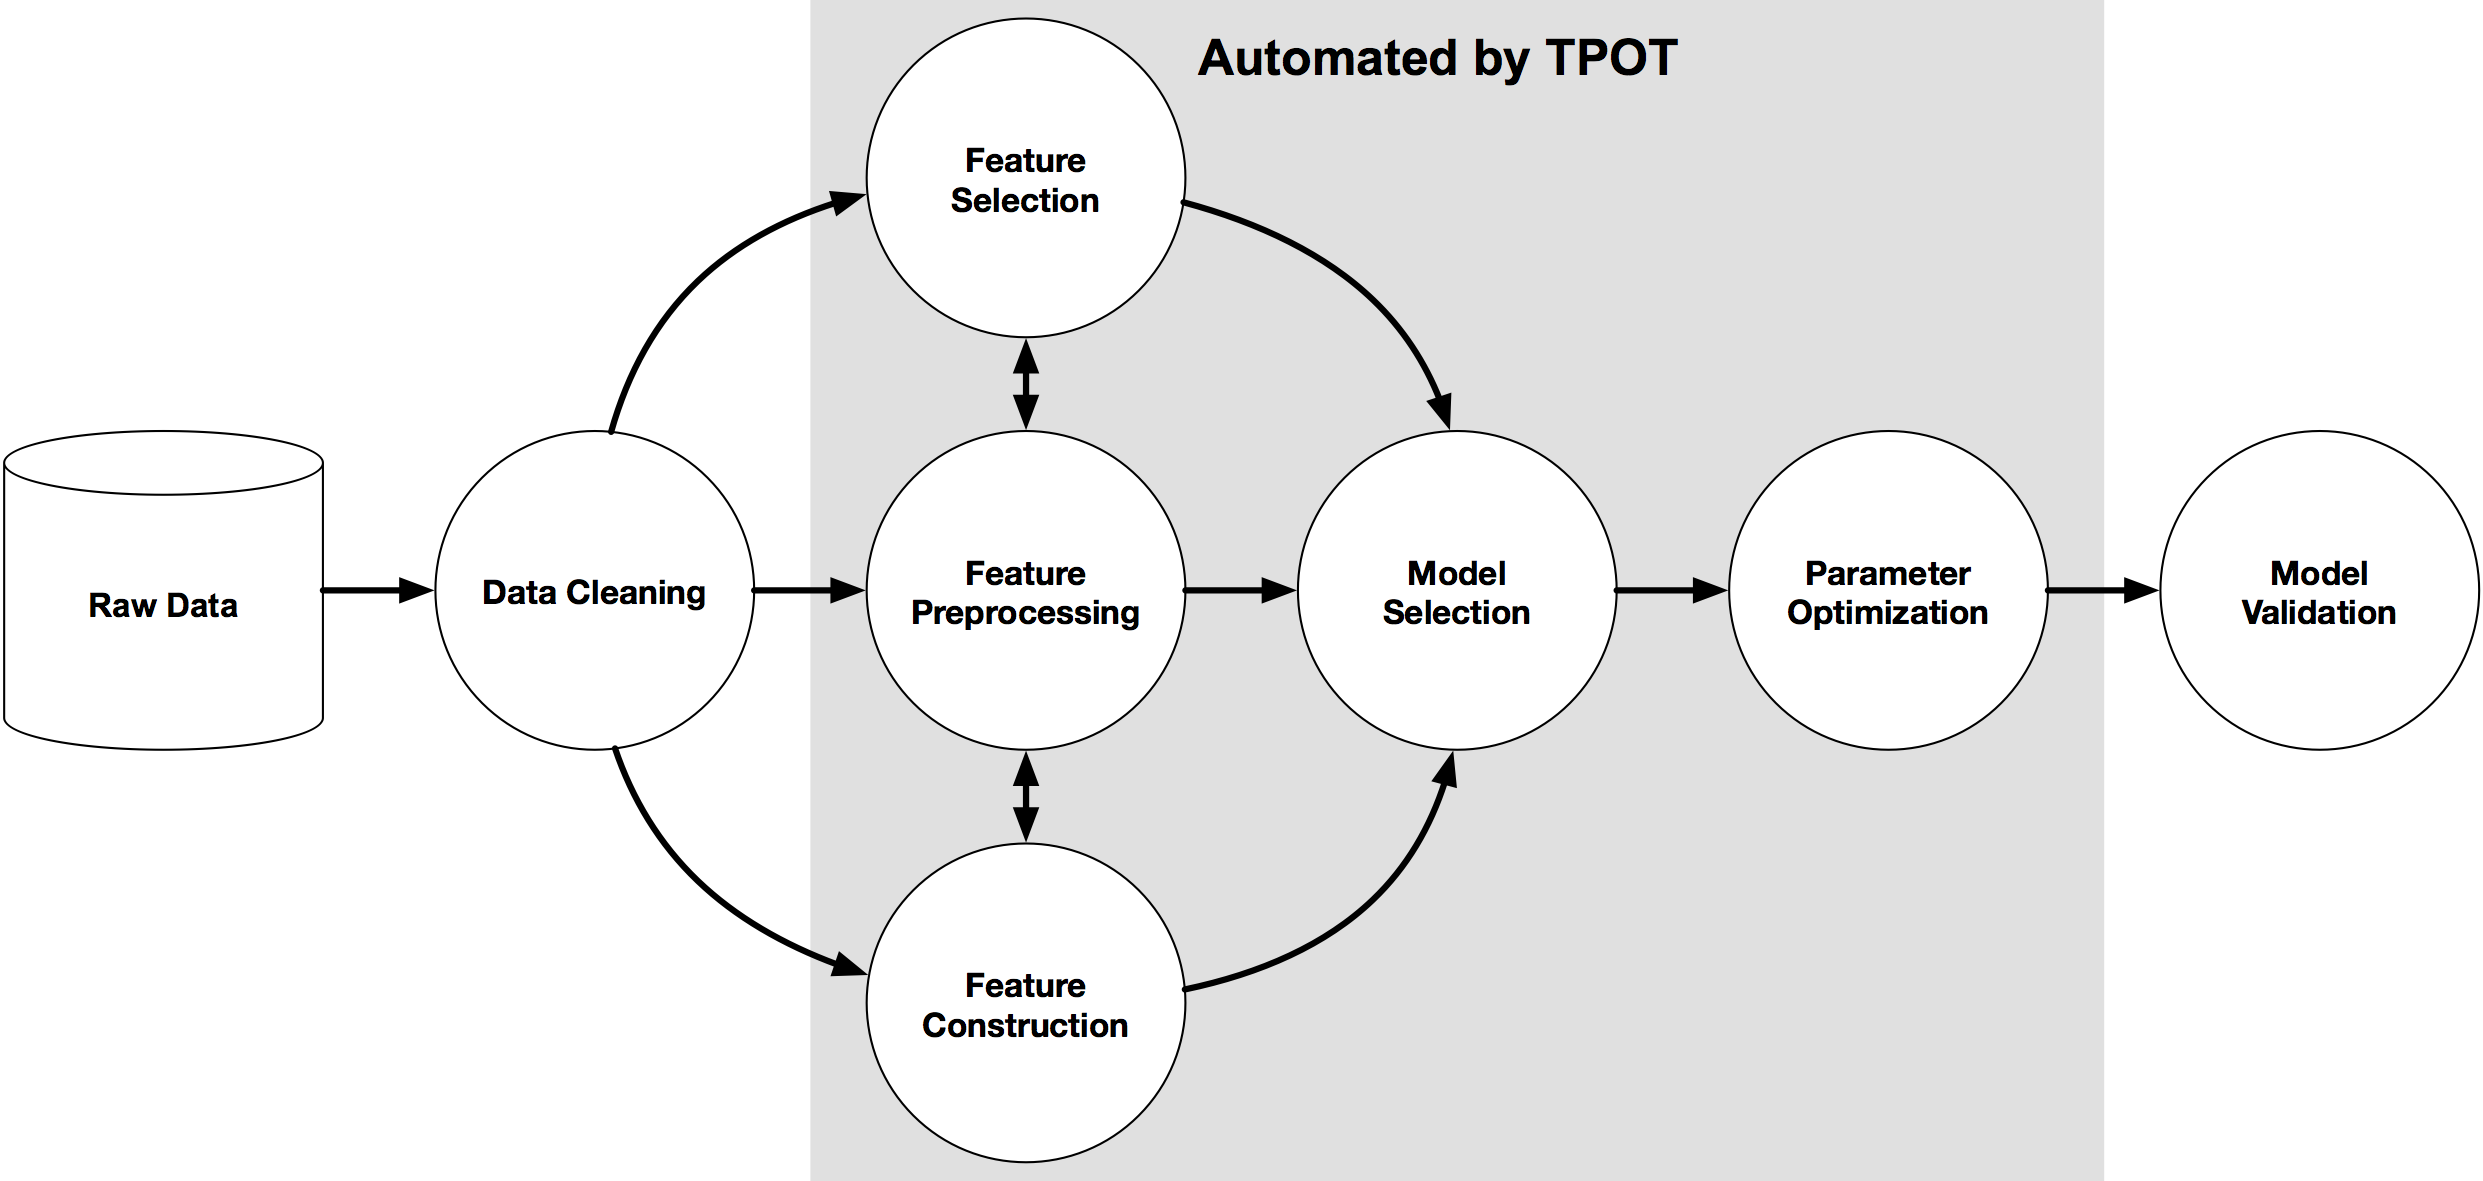

Sources:
* https://dl.acm.org/doi/pdf/10.1145/2908812.2908918
* https://github.com/EpistasisLab/tpot
* https://machinelearningmastery.com/automl-libraries-for-python/

In [81]:
# from sklearn.model_selection import RepeatedStratifiedKFold
# from tpot import TPOTClassifier
from multi_train_TPOT import MultiTrain
import pandas as pd
import matplotlib.pyplot as plt

### Initialize MultiTrain

In [ ]:
######## CREATE TRAIN AND TEST #########

# data = pd.read_csv('./data/heart/heart.csv')
# y = data['HeartDisease']
# X = data.drop(['HeartDisease'], axis=1)
# X = X.join(pd.get_dummies(X_train['Sex']))
# X = X.join(pd.get_dummies(X_train['ChestPainType']))
# X = X.join(pd.get_dummies(X_train['RestingECG']))
# X = X.join(pd.get_dummies(X_train['ExerciseAngina']))
# X = X.join(pd.get_dummies(X_train['ST_Slope']))
# X = X.drop(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], axis=1)
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# X_train.to_csv('./data/heart/X_train.csv')
# y_train.to_csv('./data/heart/y_train.csv')
# y_test.to_csv('./data/heart/y_test.csv')
# X_test.to_csv('./data/heart/X_test.csv')


In [2]:
multi = MultiTrain()
multi.X_train = pd.read_csv('./data/heart/X_train.csv', index_col=[0])
multi.y_train = pd.read_csv('./data/heart/y_train.csv', index_col=[0])
multi.X_test = pd.read_csv('./data/heart/X_test.csv', index_col=[0])
multi.y_test = pd.read_csv('./data/heart/y_test.csv', index_col=[0])


In [3]:
multi.X_train.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,F,M,ASY,ATA,NAP,TA,LVH,Normal,ST,N,Y,Down,Flat,Up
795,42,120,240,1,194,0.8,0,1,0,0,1,0,0,1,0,1,0,1,0,0
25,36,130,209,0,178,0.0,0,1,0,0,1,0,0,1,0,1,0,0,0,1
84,56,150,213,1,125,1.0,0,1,1,0,0,0,0,1,0,0,1,0,1,0
10,37,130,211,0,142,0.0,1,0,0,0,1,0,0,1,0,1,0,0,0,1
344,51,120,0,1,104,0.0,0,1,1,0,0,0,0,1,0,1,0,0,1,0


### define search

In [16]:
# generations = [4, 16, 32, 64, 128]
population_sizes = [1, 2, 4, 8, 16, 32, 64, 128]
offspring_sizes =  [1, 2, 4, 8, 16, 32, 64, 128]
mutation_rates =   [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
crossover_rates =  [0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]

# # One run:
# generations = []
# population_sizes = []
# offspring_sizes = []
# mutation_rates = []
# crossover_rates = []


In [17]:
%%time
multi.build_and_fit_classifier(dataset_name='Heart', generations=generations,
                              population_sizes=population_sizes,
                              offspring_sizes=offspring_sizes,
                              mutation_rates=mutation_rates,
                              crossover_rates=crossover_rates)

-> Fitting - Population Size: 128


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Optimization Progress:   0%|          | 0/128 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.874643556052558

Best pipeline: GradientBoostingClassifier(RandomForestClassifier(input_matrix, bootstrap=False, criterion=entropy, max_features=0.15000000000000002, min_samples_leaf=5, min_samples_split=12, n_estimators=100), learning_rate=0.01, max_depth=8, max_features=0.25, min_samples_leaf=17, min_samples_split=19, n_estimators=100, subsample=0.5)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Finished - saved to './models/Heart/tpot/tpot_Heart_population-size_128.py'
-> Fitting - Offspring Size: 128


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Optimization Progress:   0%|          | 0/100 [00:00<?, ?pipeline/s]


10.12 minutes have elapsed. TPOT will close down.
TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: ExtraTreesClassifier(Normalizer(input_matrix, norm=max), bootstrap=True, criterion=gini, max_features=0.25, min_samples_leaf=9, min_samples_split=8, n_estimators=100)
Finished - saved to './models/Heart/tpot/tpot_Heart_offspring-size_128.py'
End
CPU times: user 4min, sys: 23.1 s, total: 4min 23s
Wall time: 19min 36s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/tpot/builtins/__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")
/usr/local/lib/python3.8/dist-packages/tpot/builtins/__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency 

## Visualize 

In [21]:
collected_data = pd.read_csv('./models/Heart/tpot/logs/log_old.csv', index_col=[0])
collected_data

,Feature,Value,Elapsed_Time,Train_Score,Test_Score
0,Population_Size,1,10.905406,0.869210,0.875000
1,Population_Size,2,11.488181,0.865123,0.864130
2,Population_Size,4,16.479708,0.884196,0.858696
3,Population_Size,8,605.129283,0.888283,0.847826
4,Population_Size,16,933.041179,0.862398,0.858696
5,Population_Size,32,992.625544,0.926431,0.885870
6,Population_Size,64,963.003084,0.944142,0.885870
7,Population_Size,128,566.385641,0.937330,0.869565
8,Offspring_Size,1,378.017365,1.000000,0.847826
9,Offspring_Size,2,207.943056,0.945504,0.902174


In [23]:
population_size_df = collected_data[collected_data['Feature'] == 'Population_Size']
offspring_size_df = collected_data[collected_data['Feature'] == 'Offspring_Size']
mutcross_rates_df = collected_data[collected_data['Feature'] == 'Mutation_Crossover_Rates']

### Population Size Effects

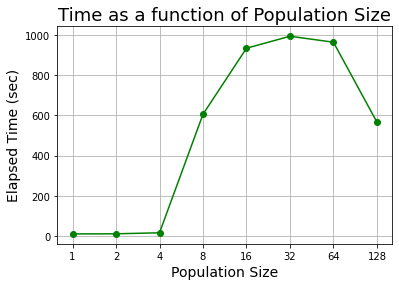

In [45]:
plt.plot(population_size_df['Value'], population_size_df['Elapsed_Time'], color='green', marker='o')
plt.title('Time as a function of Population Size', fontsize=18)
plt.xlabel('Population Size', fontsize=14)
plt.ylabel('Elapsed Time (sec)', fontsize=14)
plt.grid(True)
plt.show()

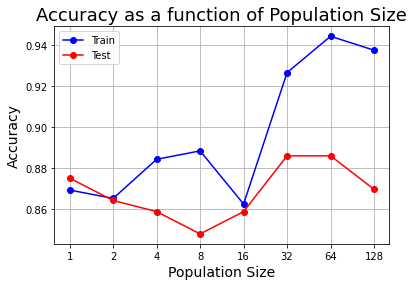

In [46]:
plt.plot(population_size_df['Value'], population_size_df['Train_Score'], color='blue', marker='o', label='Train')
plt.plot(population_size_df['Value'], population_size_df['Test_Score'], color='red', marker='o', label='Test')
plt.legend()

plt.title('Accuracy as a function of Population Size', fontsize=18)
plt.xlabel('Population Size', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.grid(True)
plt.show()

### Offspring Size Effects

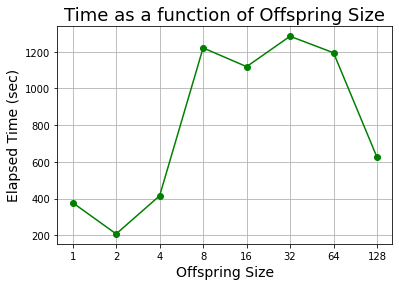

In [47]:
plt.plot(offspring_size_df['Value'], offspring_size_df['Elapsed_Time'], color='green', marker='o')
plt.title('Time as a function of Offspring Size', fontsize=18)
plt.xlabel('Offspring Size', fontsize=14)
plt.ylabel('Elapsed Time (sec)', fontsize=14)
plt.grid(True)
plt.show()

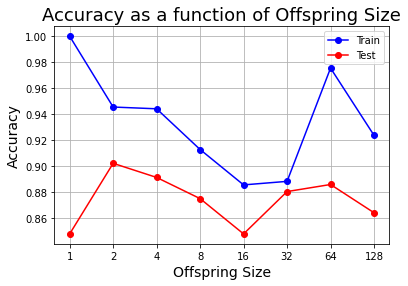

In [48]:
plt.plot(offspring_size_df['Value'], offspring_size_df['Train_Score'], color='blue', marker='o', label='Train')
plt.plot(offspring_size_df['Value'], offspring_size_df['Test_Score'], color='red', marker='o', label='Test')
plt.legend()

plt.title('Accuracy as a function of Offspring Size', fontsize=18)
plt.xlabel('Offspring Size', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.grid(True)
plt.show()

### Mutation - Crossover Rates Effects

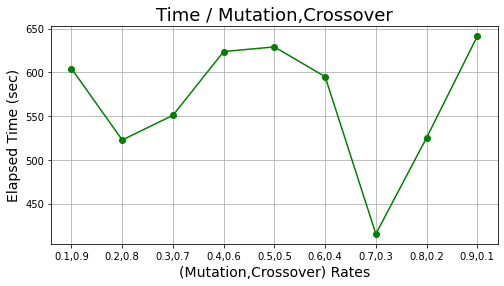

In [91]:
plt.figure(figsize=(8,4))

plt.plot(mutcross_rates_df['Value'], mutcross_rates_df['Elapsed_Time'], color='green', marker='o')
plt.title('Time / Mutation,Crossover', fontsize=18)
plt.xlabel('(Mutation,Crossover) Rates', fontsize=14)
plt.ylabel('Elapsed Time (sec)', fontsize=14)
plt.grid(True)

plt.show()

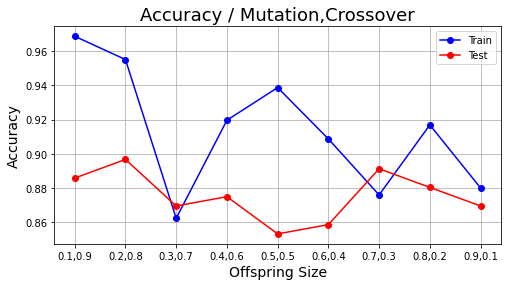

In [90]:
plt.figure(figsize=(8,4))
plt.plot(mutcross_rates_df['Value'], mutcross_rates_df['Train_Score'], color='blue', marker='o', label='Train')
plt.plot(mutcross_rates_df['Value'], mutcross_rates_df['Test_Score'], color='red', marker='o', label='Test')
plt.legend()

plt.title('Accuracy / Mutation,Crossover', fontsize=18)
plt.xlabel('Offspring Size', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.grid(True)
plt.show()